In [40]:
mutable struct Pendulum
    mass::Number
    len::Number
    θ::Number
    θ_dot::Number
end

In [209]:
dt = 1
g = 9.82

9.82

In [44]:
function single_pendulum_iteration(pen::Pendulum)

    pen.θ_dot += -dt * pen.len * pen.θ
    pen.θ += pen.θ_dot * dt
    
    return pen.len * sin(pen.θ), -pen.len * cos(pen.θ)
end

single_pendulum_iteration (generic function with 1 method)

In [149]:
double_pendulum_iteration(pen1, pen2)

4-element Vector{Float64}:
 -0.8414709848078965
 -0.5403023058681398
 -1.682941969615793
 -1.0806046117362795

In [155]:
using Random
using Plots

pen = Pendulum(1, 1, -1, 0)

x = [0, pen.len * sin(pen.θ)]
y = [0, -cos(pen.θ)]

anim = @animate for i in 1:50
    x[2], y[2] = single_pendulum_iteration(pen)    
    plot(x, y, xlims=(-1,1),ylims=(-1.2,0.2); marker=(:circle,1))
    # scatter(x, y)
end

Animation("/var/folders/z0/_9x091jj0vs_797b_p_b7vcc0000gq/T/jl_KTIxrZ", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000041.png", "000042.png", "000043.png", "000044.png", "000045.png", "000046.png", "000047.png", "000048.png", "000049.png", "000050.png"])

[ Info: Saved animation to /Users/05jaco01/Code/Physics/Pendulums/tmp.gif


Plots.AnimatedGif("/Users/05jaco01/Code/Physics/Pendulums/tmp.gif")
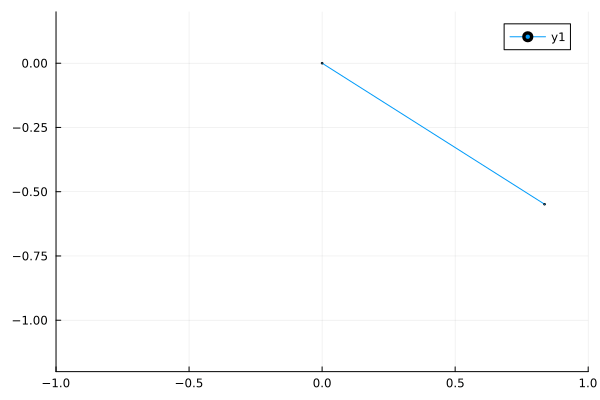

In [47]:
gif(anim, fps=10)

In [224]:
function double_pendulum_iteration(pen1::Pendulum, pen2::Pendulum)

    Δθ = pen1.θ - pen2.θ
    α = pen1.mass +pen2.mass*(sin(Δθ))^2
    M = pen1.mass + pen2.mass
    
    pen1.θ_dot += ((-1)*sin(Δθ)*(pen2.mass*pen1.len*(pen1.θ_dot^2)*cos(Δθ)+pen2.mass*pen2.len*(pen2.θ_dot)^2))
        -g*(M*sin(pen1.θ)-pen2.mass*sin(pen2.θ)*cos(Δθ))/(pen1.len*α)

    pen2.θ_dot += (
    (sin(Δθ)*(M*pen1.len*(pen1.θ_dot)^2+pen2.mass*pen2.len*(pen2.θ_dot)^2*cos(Δθ))
        +g*(M*sin(pen1.θ)*cos(Δθ)-M*sin(pen2.θ))
        )/(pen2.len*α)
    )
    
    pen1.θ += pen1.θ_dot * dt
    pen2.θ += pen2.θ_dot * dt
    
    x_1, y_1 = (pen1.len * sin(pen1.θ), -cos(pen1.θ)*pen1.len)
    x_2, y_2 = (pen1.len * sin(pen1.θ) + pen2.len * sin(pen2.θ), -cos(pen1.θ)*pen1.len-pen2.len*cos(pen2.θ))
    return return [x_1, y_1, x_2, y_2]   
end

double_pendulum_iteration (generic function with 1 method)

In [233]:
using Random
using Plots

pen1 = Pendulum(0.01, 5, 1, 0)
pen2 = Pendulum(0.01, 5, 0, 0)

x1, y1 = (pen1.len * sin(pen1.θ), -cos(pen1.θ)*pen1.len)
x2, y2 = (pen1.len * sin(pen1.θ) + pen2.len * sin(pen2.θ), -cos(pen1.θ)*pen1.len-pen2.len*cos(pen2.θ))

x = [0, x1, x2]
y = [0, y1, y2]

anim = @animate for i in 1:50
    x[2], y[2], x[3], y[3] = double_pendulum_iteration(pen1, pen2)
    plot(x, y, xlims=(-10,10),ylims=(-10,10); marker=(:circle,1))
    # scatter(x, y)
end

Animation("/var/folders/z0/_9x091jj0vs_797b_p_b7vcc0000gq/T/jl_wxm7VV", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000041.png", "000042.png", "000043.png", "000044.png", "000045.png", "000046.png", "000047.png", "000048.png", "000049.png", "000050.png"])

[ Info: Saved animation to /Users/05jaco01/Code/Physics/Pendulums/tmp.gif


Plots.AnimatedGif("/Users/05jaco01/Code/Physics/Pendulums/tmp.gif")
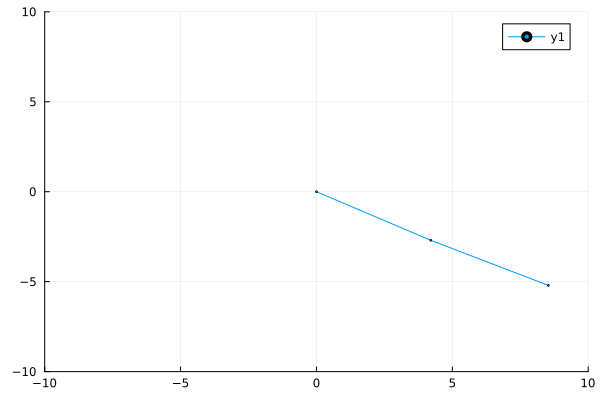

In [234]:
gif(anim, fps=100)